In [5]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [24]:
def plot_meridional_transport(infile):
    Cp = 3992.0 # Heat capacity from OM4_05 configuration 
    rho0 = 1035.0 # Boussinesq approximation
    W_to_PW = 1/1e15 # Convert Watts to Petawatss

    ndiff_y_2d_T = nc.Dataset(infile).variables['ndiff_tracer_trans_y_2d_T'][:,:,:]
    adv_y_2d_T = nc.Dataset(infile).variables['T_ady_2d'][:,:,:]
    lat = nc.Dataset(infile).variables['yh'][:]

    ndiff_T_sum = ndiff_y_2d_T.sum(axis=2).squeeze()*W_to_PW
    adv_T_sum = adv_y_2d_T.sum(axis=2).squeeze()*Cp*rho0*W_to_PW

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(lat,adv_T_sum+ndiff_T_sum)
    plt.xlim(-65,65)
    plt.title('(Advective+Diffusive) Meridional Transport')
    plt.ylabel('Petawatts')
    plt.grid()
    plt.subplot(2,1,2)
    plt.plot(lat,ndiff_T_sum)
    plt.xlim(-65,65)
    plt.grid()
    plt.ylabel('Petawatts')
    plt.title('Neutral diffusion meridional transport')
    
    print(ndiff_T_sum.max())
    print(ndiff_T_sum.min())

# Sanity-checking MOM6 isoneutral Meridional Heat Transport

The eddy contribution to meridional heat transport (MHT) has been estimated to be $O(0.1\textrm{PW})$ in the subpolar regions in eddy-permitting ocean models (*Volkov et al.* [2008] and *Jayne and Marotzke* [2002]). Both of these studies average in time to separate the MHT into eddy and mean flow components.

<img src="http://onlinelibrary.wiley.com/store/10.1029/2008GL035490/asset/image_n/grl25122-fig-0002.png?v=1&s=bab89c7684d26894970310a0a8687a6e34f854d2">
Figure 1. (a) Time-mean zonally integrated total heat transport (PW), (b) time-mean zonally integrated eddy heat transport (PW) (Caption and figure taken from Figure 2 of Volkov et al., [2008], note that in Panel (a) the lg)

This notebook calculates the zonally-summed meridional components of both meridional advection (which includes the Gent-McWilliams transport) and neutral diffusion fluxes from annually averaged output from a CORE-forced run and a coupled run. Because this is not a true eddy-mean decomposition, the eddy contribution in the tropics (where eddies are likely to be resolved) is likely to be low but should give a rough order of magnitude estimate in the extratropics.

## Notes about tracer neutral diffusion in OM4_05
Various options regarding neutral diffusion of tracers can be found in the MOM_parameter_doc.all of MOM6-examples for OM4_05 (OM4_025 currently sets diffusivity to 0).
1. Variable mixing is TRUE (see note at end)
2. $\kappa$ for tracers is not a function of MEKE
3. $\kappa$ not resolution scaled 
4. Passivity is 0
5. Minimum $\kappa$ is 500 m$^2$ s$^-1$

Despite what (1) would suggest, the effective $\kappa$ used for tracers is spatially uniform and set to a value of 500 m$^2$ s$^-1$. For variable mixing to be implemented, the parameter VISBECK_L_SCALE would have to be set to an non-zero value. 

## MHT in Coupled CM4
The following figure is from a pre-industrial control run of CM4 using a 0.5$^\circ$ configuration of MOM6.
* Max northward eddy-MHT: 0.07PW
* Max southward eddy-MHT: 0.14PW

<IPython.core.display.Javascript object>


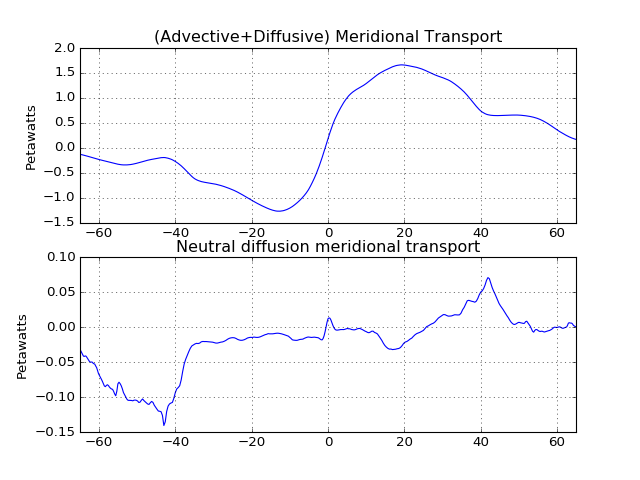

0.0711524
-0.140742


In [25]:
infile = '/archive/Ming.Zhao/mdt/20170118/CM4_c96L32_am4g12r13C_1850_OMp5_H5_ndiff_meke_MLE30d_ePBLn/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/av/annual_5yr/ocean_annual.0136-0140.ann.nc'
plot_meridional_transport(infile)

## MHT in CORE-Forced CM4
The following figure is from a CORE-forced run using a 0.5$^\circ$ configuration of MOM6
* Max northward eddy-MHT: 0.07PW
* Max southward eddy-MHT: 0.11PW

<IPython.core.display.Javascript object>


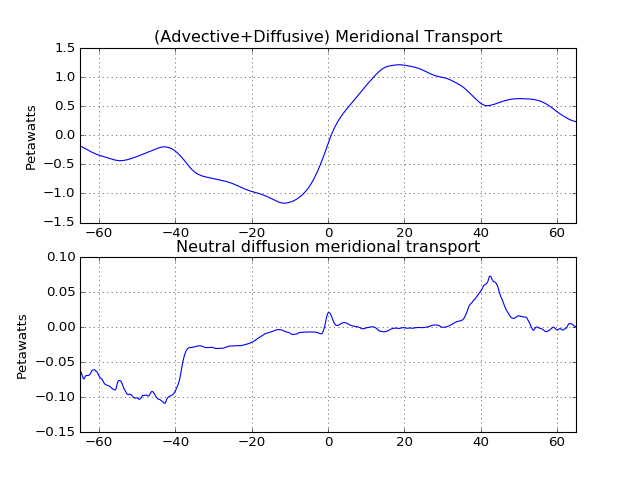

0.0730592
-0.108974


In [26]:
infile='/archive/John.Krasting/testing_20170201_mom6_2016.12.23/OM4_SIS2_05_CORE2_COBALT_cfc_sf6_abio2/gfdl.ncrc4-intel16-prod/pp/ocean_annual/av/annual_5yr/ocean_annual.2113-2117.ann.nc'
plot_meridional_transport(infile)